In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df_tot=pd.read_csv('Accidents21-22.csv')
df=pd.read_csv('tot_sense_repetits.csv')

In [3]:
df_tot

,Case_number,District_code,District_name,Neighborhood_code,Neighborhood_name,Street_code,Street_name,Postal_number,Week_day,Year,...,Day,Holiday,Time_segment,Vacation_day,Long_weekend,Numero_expedient_count,Number of victims,Slightly injured,Severely injured,Week_Day
0,2021S000004,2,Eixample,5,el Fort Pienc,144601,Diagonal,0223 0223,Friday,2021,...,1/01/2021,Not Holiday,Afternoon,False,Nothing,4,0,0,1,Friday
1,2021S000004,2,Eixample,5,el Fort Pienc,144601,Diagonal,0223 0223,Friday,2021,...,1/01/2021,Not Holiday,Afternoon,False,Nothing,4,0,0,1,Friday
2,2021S000004,2,Eixample,5,el Fort Pienc,144601,Diagonal,0223 0223,Friday,2021,...,1/01/2021,Not Holiday,Afternoon,False,Nothing,4,0,0,1,Friday
3,2021S000004,2,Eixample,5,el Fort Pienc,144601,Diagonal,0223 0223,Friday,2021,...,1/01/2021,Not Holiday,Afternoon,False,Nothing,4,0,0,1,Friday
4,2021S000002,2,Eixample,8,l'Antiga Esquerra de l'Eixample,18505,Aragó,0218 0218,Friday,2021,...,1/01/2021,Not Holiday,Morning,False,Nothing,4,0,1,0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,2022S008009,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,28000,Augusta,0248 0250,Saturday,2022,...,31/12/2022,Not Holiday,Afternoon,True,Nothing,2,0,0,1,Saturday
17915,2022S008009,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,28000,Augusta,0248 0250,Saturday,2022,...,31/12/2022,Not Holiday,Afternoon,True,Nothing,2,0,1,0,Saturday
17916,2022S008010,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,144601,Diagonal,0582 0582,Saturday,2022,...,31/12/2022,Not Holiday,Work Departure,True,Nothing,1,0,1,0,Saturday
17917,2022S008011,8,Nou Barris,48,la Guineueta,75101,Caçador,0004X0004X,Saturday,2022,...,31/12/2022,Not Holiday,Afternoon,True,Nothing,1,0,1,0,Saturday


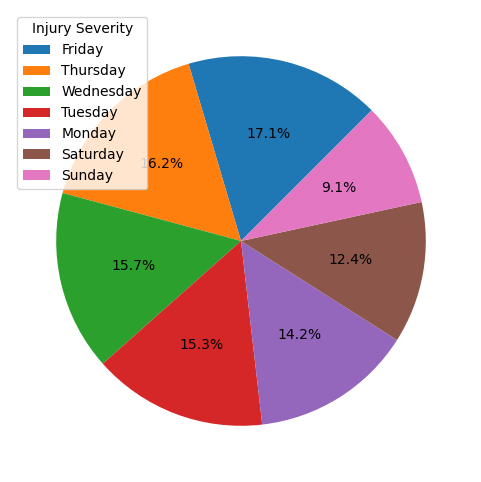

In [5]:
values = df_tot['Week_day'].value_counts()
valors = values.index.values

plt.figure(figsize=(6, 6))
plt.pie(values, autopct='%1.1f%%', startangle=45, radius=1)
plt.legend(valors, loc='best', title='Injury Severity', fontsize=10)
#plt.savefig('pie_chart.jpg', dpi=15)
plt.show()

C:\Users\julsd\Nueva carpeta\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Hospitalized'),
  Text(1, 0, 'Slight Assistance'),
  Text(2, 0, 'Slight'),
  Text(3, 0, 'Severe'),
  Text(4, 0, 'Dead'),
  Text(5, 0, 'Natural Death')])

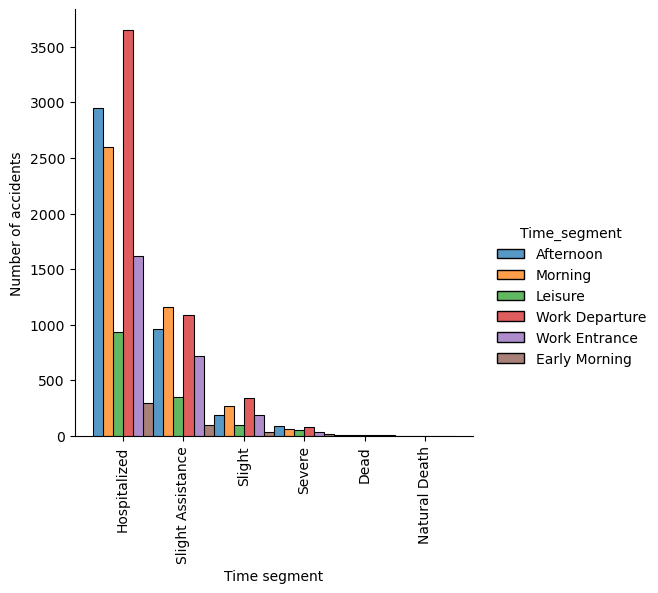

In [6]:
sns.displot(df_tot, x="Injury_severity", hue="Time_segment" , multiple="dodge")
plt.xlabel('Time segment', fontsize=10)
plt.ylabel('Number of accidents', fontsize=10)
plt.xticks(rotation=90)

In [7]:
pd.crosstab(index=df_tot['Injury_severity'],
            columns=df_tot['Time_segment'], margins=True).apply(lambda r: r/len(df_tot)*100)

Time_segment,Afternoon,Early Morning,Leisure,Morning,Work Departure,Work Entrance,All
Injury_severity,,,,,,,
Dead,0.027903,0.027903,0.027903,0.039065,0.044645,0.027903,0.195323
Hospitalized,16.474134,1.629555,5.229086,14.476254,20.386182,9.029522,67.224734
Natural Death,0.000000,0.000000,0.000000,0.005581,0.000000,0.000000,0.005581
Severe,0.507841,0.122775,0.290195,0.334840,0.446453,0.212065,1.914169
Slight,1.077069,0.212065,0.530164,1.501200,1.897427,1.071488,6.289413
Slight Assistance,5.351861,0.546906,1.930911,6.490318,6.049445,4.001339,24.370780
All,23.438808,2.539204,8.008259,22.847257,28.824153,14.342318,100.000000


In [8]:
df_tot['Injury_severity'].value_counts()

Injury_severity
Hospitalized         12046
Slight Assistance     4367
Slight                1127
Severe                 343
Dead                    35
Natural Death            1
Name: count, dtype: int64

In [9]:
pd.crosstab(index=df['Injury_severity'],
            columns=df['Time_segment'], margins=True).apply(lambda r: r/len(df))

Time_segment,Afternoon,Early Morning,Leisure,Morning,Work Departure,Work Entrance,All
Injury_severity,,,,,,,
Dead,0.000352,0.000282,0.000282,0.000422,0.000493,0.000282,0.002112
Hospitalized,0.167030,0.014922,0.051454,0.152249,0.211938,0.098543,0.696136
Natural Death,0.000000,0.000000,0.000000,0.000070,0.000000,0.000000,0.000070
Severe,0.004857,0.001197,0.003238,0.003449,0.004927,0.002252,0.019920
Slight,0.008306,0.001337,0.004434,0.011966,0.014711,0.009221,0.049975
Slight Assistance,0.049271,0.004716,0.018090,0.061871,0.057225,0.040614,0.231787
All,0.229816,0.022454,0.077497,0.230027,0.289294,0.150912,1.000000


C:\Users\julsd\Nueva carpeta\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

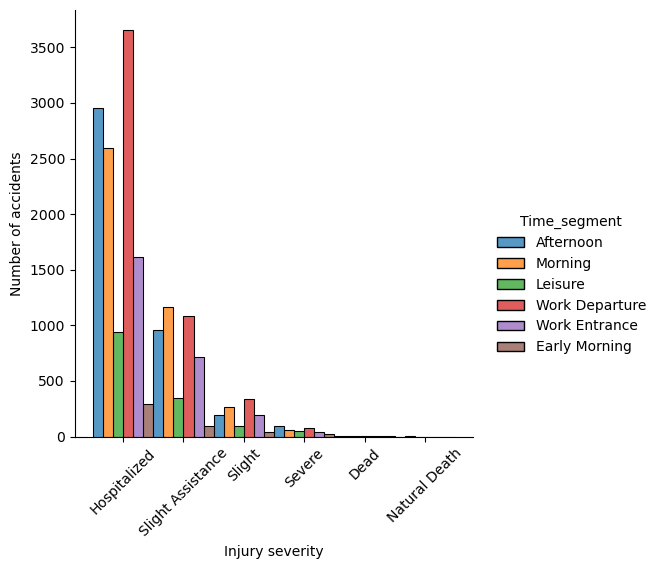

<Figure size 600x600 with 0 Axes>

In [10]:
sns.displot(df_tot, x="Injury_severity", hue="Time_segment" , multiple="dodge")
plt.xlabel('Injury severity', fontsize=10)
plt.ylabel('Number of accidents', fontsize=10)
plt.xticks(rotation=45)
plt.figure(figsize=(6, 6))

In [11]:
df['District_name'].value_counts()

District_name
Eixample               4105
Sant Martí             1790
Sants-Montjuïc         1505
Sarrià-Sant Gervasi    1503
Horta-Guinardó         1059
Sant Andreu             962
Les Corts               961
Nou Barris              772
Ciutat Vella            757
Gràcia                  699
Unkown                   94
Name: count, dtype: int64

In [12]:
sns.factorplot(x='District_name', data=df, kind='count', palette='Set1')
plt.title('Number of accidents sorted by district')
plt.xlabel('District', fontsize=10)
plt.ylabel('Number of accidents', fontsize=10)
plt.xticks(rotation=45)
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [ ]:
df['Week_day']= df['Week_day'].replace(['MOnday'], ['Monday'])
df_tot['Week_day']= df_tot['Week_day'].replace(['MOnday'], ['Monday'])
df_tot.to_csv('Accidents21-22.csv',index=False)
df.to_csv('tot_sense_repetits.csv',index=False)

In [ ]:
sns.factorplot(x='Week_day', data=df, kind='count', palette='Set1', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of accidents sorted by day')
plt.xlabel('Day', fontsize=10)
plt.ylabel('Number of accidents', fontsize=10)
plt.xticks(rotation=45)
plt.show()

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14207 entries, 0 to 14206
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Case_number                     14207 non-null  object 
 1   District_code                   14207 non-null  int64  
 2   District_name                   14207 non-null  object 
 3   Neighborhood_code               14207 non-null  int64  
 4   Neighborhood_name               14207 non-null  object 
 5   Street_code                     14207 non-null  int64  
 6   Street_name                     14207 non-null  object 
 7   Postal_number                   14207 non-null  object 
 8   Week_day                        14207 non-null  object 
 9   Year                            14207 non-null  int64  
 10  Month                           14207 non-null  int64  
 11  Month_name                      14207 non-null  object 
 12  Day_month                       

C:\Users\julsd\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


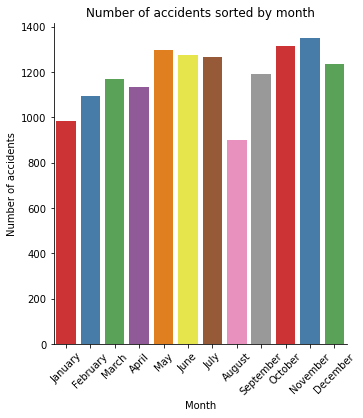

In [196]:
sns.factorplot(x='Month_name', data=df, kind='count', palette='Set1', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Number of accidents sorted by month')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Number of accidents', fontsize=10)
plt.xticks(rotation=45)
plt.show()

C:\Users\julsd\Nueva carpeta\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


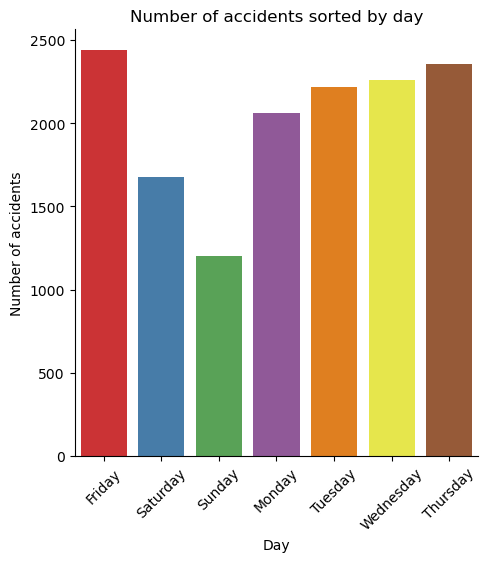

In [16]:
sns.catplot(x='Week_day', data=df, kind='count', palette='Set1')
plt.title('Number of accidents sorted by day')
plt.xlabel('Day', fontsize=10)
plt.ylabel('Number of accidents', fontsize=10)
plt.xticks(rotation=45)
plt.show()

In [17]:
pd.crosstab(index=df['District_name'],
            columns=df['Injury_severity'], margins=True).apply(lambda r: r)

Injury_severity,Dead,Hospitalized,Natural Death,Severe,Slight,Slight Assistance,All
District_name,,,,,,,
Ciutat Vella,1,533,0,17,42,164,757
Eixample,7,2763,0,79,198,1058,4105
Gràcia,0,504,1,7,31,156,699
Horta-Guinardó,2,758,0,28,65,206,1059
Les Corts,1,656,0,20,51,233,961
Nou Barris,2,564,0,19,36,151,772
Sant Andreu,0,705,0,11,44,202,962
Sant Martí,5,1271,0,29,80,405,1790
Sants-Montjuïc,7,1055,0,36,76,331,1505


In [18]:
pd.crosstab(index=df_tot['District_name'],
            columns=df_tot['Injury_severity'], margins=True).apply(lambda r: r)

Injury_severity,Dead,Hospitalized,Natural Death,Severe,Slight,Slight Assistance,All
District_name,,,,,,,
Ciutat Vella,1,628,0,22,77,223,951
Desconegut,0,84,0,1,3,34,122
Eixample,8,3321,0,92,297,1363,5081
Gràcia,0,579,1,11,50,200,841
Horta-Guinardó,2,954,0,31,101,280,1368
Les Corts,2,825,0,25,77,303,1232
Nou Barris,2,706,0,22,65,206,1001
Sant Andreu,0,840,0,17,82,270,1209
Sant Martí,6,1575,0,39,123,547,2290


C:\Users\julsd\Nueva carpeta\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

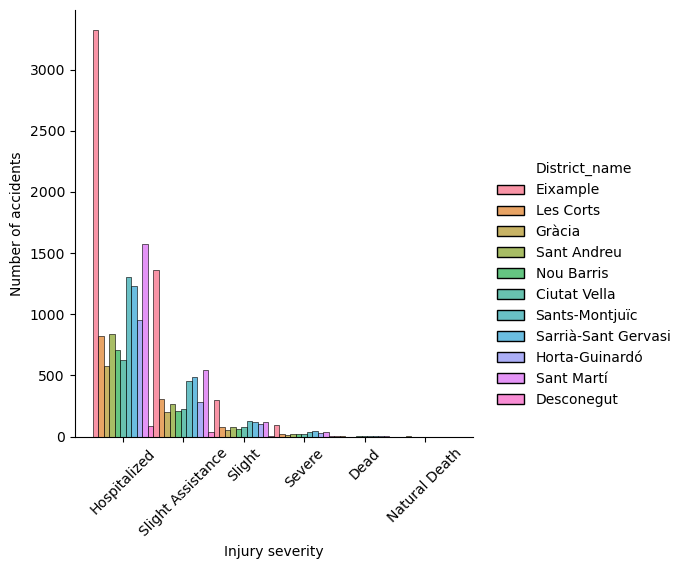

<Figure size 600x600 with 0 Axes>

In [19]:
sns.displot(df_tot, x="Injury_severity", hue="District_name" , multiple="dodge")
plt.xlabel('Injury severity', fontsize=10)
plt.ylabel('Number of accidents', fontsize=10)
plt.xticks(rotation=45)
plt.figure(figsize=(6, 6))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14207 entries, 0 to 14206
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Case_number                     14207 non-null  object 
 1   District_code                   14207 non-null  int64  
 2   District_name                   14207 non-null  object 
 3   Neighborhood_code               14207 non-null  int64  
 4   Neighborhood_name               14207 non-null  object 
 5   Street_code                     14207 non-null  int64  
 6   Street_name                     14207 non-null  object 
 7   Postal_number                   14207 non-null  object 
 8   Week_day                        14207 non-null  object 
 9   Year                            14207 non-null  int64  
 10  Month                           14207 non-null  int64  
 11  Month_name                      14207 non-null  object 
 12  Day_month                       

In [203]:
df['Coordinate_UTM_Y_ED50'][0]

4583943.06

In [22]:
pd.crosstab(index=df['Long_weekend'], columns=df['Injury_severity'], margins=True).apply(lambda r: r)

Injury_severity,Dead,Hospitalized,Natural Death,Severe,Slight,Slight Assistance,All
Long_weekend,,,,,,,
Nothing,30,9640,1,273,693,3222,13859
Sortida Pont,0,250,0,10,17,71,348
All,30,9890,1,283,710,3293,14207


In [23]:
df['Long_weekend'].value_counts()

Long_weekend
Nothing         13859
Sortida Pont      348
Name: count, dtype: int64

In [208]:
df['Vacation_day'].value_counts()

False    11221
True      2986
Name: Vacation_day, dtype: int64

C:\Users\julsd\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


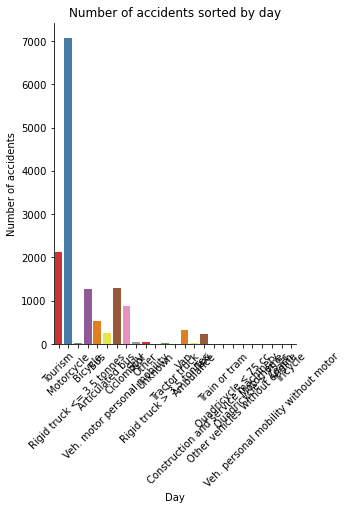

In [209]:
sns.factorplot(x='Type_of_vehicle', data=df, kind='count', palette='Set1')
plt.title('Number of accidents sorted by day')
plt.xlabel('Day', fontsize=10)
plt.ylabel('Number of accidents', fontsize=10)
plt.xticks(rotation=45)
plt.show()

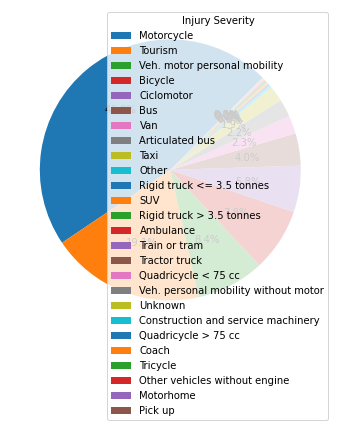

In [210]:
values = df_tot['Type_of_vehicle'].value_counts()
valors = values.index.values

plt.figure(figsize=(6, 6))
plt.pie(values, autopct='%1.1f%%', startangle=45, radius=1)
plt.legend(valors, loc='best', title='Injury Severity', fontsize=10)
#plt.savefig('pie_chart.jpg', dpi=15)
plt.show()

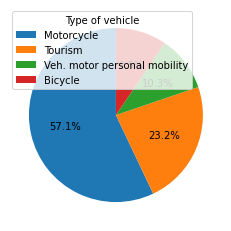

In [234]:
values=df_tot['Type_of_vehicle'].value_counts()

# Get the top 3 most repeated values
top3_values = values.index.values[:4]

# Create a circular graph with the given values
plt.pie(values.loc[top3_values], autopct='%1.1f%%', startangle=90)

# Change the legend format
plt.legend(top3_values, loc='upper left', title='Type of vehicle')

# Show the graph
#plt.show()

In [212]:
df_tot['Type_of_vehicle'].value_counts()

Motorcycle                              8410
Tourism                                 3416
Veh. motor personal mobility            1514
Bicycle                                 1401
Ciclomotor                              1031
Bus                                      716
Van                                      405
Articulated bus                          392
Taxi                                     339
Other                                     62
Rigid truck <= 3.5 tonnes                 49
SUV                                       47
Rigid truck > 3.5 tonnes                  44
Ambulance                                 21
Train or tram                             13
Tractor truck                             13
Quadricycle < 75 cc                       11
Veh. personal mobility without motor       9
Unknown                                    8
Construction and service machinery         4
Quadricycle > 75 cc                        3
Coach                                      3
Tricycle  

In [213]:
pd.crosstab(index=df_tot['Type_of_vehicle'],
            columns=df_tot['Injury_severity'], margins=True).apply(lambda r: r)

Injury_severity,Dead,Hospitalized,Natural Death,Severe,Slight,Slight Assistance,All
Type_of_vehicle,,,,,,,
Ambulance,0,16,0,1,0,4,21
Articulated bus,0,262,0,6,26,98,392
Bicycle,0,943,0,18,77,363,1401
Bus,2,502,0,11,25,176,716
Ciclomotor,1,700,0,18,53,259,1031
Coach,0,3,0,0,0,0,3
Construction and service machinery,0,3,0,0,0,1,4
Motorcycle,23,5771,0,204,390,2022,8410
Motorhome,0,1,0,0,0,1,2


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14207 entries, 0 to 14206
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Case_number                     14207 non-null  object 
 1   District_code                   14207 non-null  int64  
 2   District_name                   14207 non-null  object 
 3   Neighborhood_code               14207 non-null  int64  
 4   Neighborhood_name               14207 non-null  object 
 5   Street_code                     14207 non-null  int64  
 6   Street_name                     14207 non-null  object 
 7   Postal_number                   14207 non-null  object 
 8   Week_day                        14207 non-null  object 
 9   Year                            14207 non-null  int64  
 10  Month                           14207 non-null  int64  
 11  Month_name                      14207 non-null  object 
 12  Day_month                       

In [215]:
df_tot['Age'].value_counts()

25    513
30    508
27    508
29    504
28    490
     ... 
94      6
93      4
96      4
97      3
95      1
Name: Age, Length: 99, dtype: int64

In [26]:
df4=pd.read_csv('Accidents21-22.csv')

In [27]:
df4

,Case_number,District_code,District_name,Neighborhood_code,Neighborhood_name,Street_code,Street_name,Postal_number,Week_day,Year,...,Day,Holiday,Time_segment,Vacation_day,Long_weekend,Numero_expedient_count,Number of victims,Slightly injured,Severely injured,Week_Day
0,2021S000004,2,Eixample,5,el Fort Pienc,144601,Diagonal,0223 0223,Friday,2021,...,1/01/2021,Not Holiday,Afternoon,False,Nothing,4,0,0,1,Friday
1,2021S000004,2,Eixample,5,el Fort Pienc,144601,Diagonal,0223 0223,Friday,2021,...,1/01/2021,Not Holiday,Afternoon,False,Nothing,4,0,0,1,Friday
2,2021S000004,2,Eixample,5,el Fort Pienc,144601,Diagonal,0223 0223,Friday,2021,...,1/01/2021,Not Holiday,Afternoon,False,Nothing,4,0,0,1,Friday
3,2021S000004,2,Eixample,5,el Fort Pienc,144601,Diagonal,0223 0223,Friday,2021,...,1/01/2021,Not Holiday,Afternoon,False,Nothing,4,0,0,1,Friday
4,2021S000002,2,Eixample,8,l'Antiga Esquerra de l'Eixample,18505,Aragó,0218 0218,Friday,2021,...,1/01/2021,Not Holiday,Morning,False,Nothing,4,0,1,0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,2022S008009,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,28000,Augusta,0248 0250,Saturday,2022,...,31/12/2022,Not Holiday,Afternoon,True,Nothing,2,0,0,1,Saturday
17915,2022S008009,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,28000,Augusta,0248 0250,Saturday,2022,...,31/12/2022,Not Holiday,Afternoon,True,Nothing,2,0,1,0,Saturday
17916,2022S008010,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,144601,Diagonal,0582 0582,Saturday,2022,...,31/12/2022,Not Holiday,Work Departure,True,Nothing,1,0,1,0,Saturday
17917,2022S008011,8,Nou Barris,48,la Guineueta,75101,Caçador,0004X0004X,Saturday,2022,...,31/12/2022,Not Holiday,Afternoon,True,Nothing,1,0,1,0,Saturday


In [28]:
df4['Age'] = df4['Age'].apply(lambda x: np.nan if x == 'Desconegut' else x)
#df3['Person_type'] = df3['Person_type'].apply(lambda x: np.nan if x == 'Pedestrian' else x)
df4.dropna(inplace=True)

In [29]:
df4['Age'].value_counts()

Age
25    512
27    503
30    502
29    502
28    486
     ... 
94      6
93      4
96      4
97      3
95      1
Name: count, Length: 98, dtype: int64

In [30]:
df4['Age'] = df4['Age'].astype(int)

In [31]:
df4['Age'].value_counts().head(40)

Age
25    512
27    503
30    502
29    502
28    486
26    477
31    461
24    448
35    419
33    417
23    410
34    408
32    407
22    407
44    380
42    379
38    370
21    360
36    359
39    354
40    347
41    344
45    339
43    339
46    334
37    329
20    315
51    312
50    311
48    305
47    290
49    279
52    275
54    269
53    255
19    246
57    239
55    233
56    230
58    215
Name: count, dtype: int64

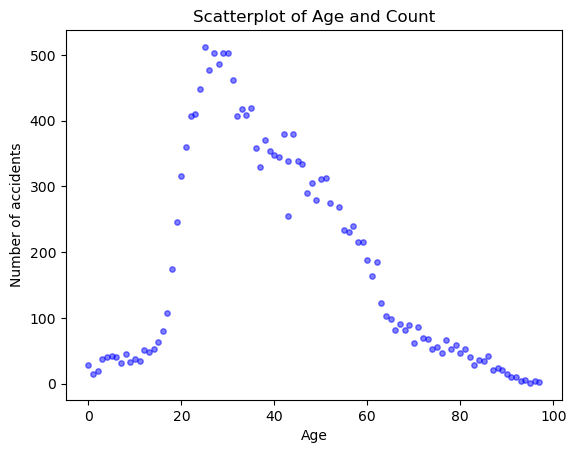

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

d=([25, 27, 30, 29, 28, 26, 31, 24, 35, 33, 23, 34, 32, 22, 44, 42, 38, 21, 36, 39, 40, 41, 45, 43, 46, 37, 20, 51,50, 48, 47, 49, 52, 54, 43, 19, 57, 55, 56, 58, 59, 60, 62, 18, 61, 63, 17, 64, 65, 67, 69, 71, 66, 68, 16, 72, 73, 77, 15, 70, 79, 75, 74, 81, 14, 78, 12, 13, 76, 80, 8, 86, 5, 4, 82, 6, 10, 3, 84, 11, 85, 9, 7, 0, 83, 88, 89, 87, 2, 1, 90, 92, 91, 94, 93, 96, 97, 95])

counts = df4['Age'].value_counts()
plt.scatter(d, counts, s=15, c='blue', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Number of accidents')
plt.title('Scatterplot of Age and Count')
plt.show()

In [34]:
tipo=pd.read_csv('license.csv')

In [35]:
tipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29254 entries, 0 to 29253
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Case_number      29244 non-null  object
 1   Type_of_vehicle  29244 non-null  object
 2   License type     29244 non-null  object
 3   Age license      29244 non-null  object
dtypes: object(4)
memory usage: 914.3+ KB


In [36]:
tipo['Age license'].value_counts()

Age license
Desconegut    5908
1             1136
3              992
4              924
2              910
              ... 
70               3
66               3
68               2
74               1
69               1
Name: count, Length: 73, dtype: int64

In [37]:
tipo['Age license'] = tipo['Age license'].apply(lambda x: np.nan if x == 'Desconegut' else x)
tipo.dropna(inplace=True)

In [38]:
tipo['Age license'] = tipo['Age license'].astype(int)

In [39]:
tipo['Age license'].value_counts()

Age license
1     1136
3      992
4      924
2      910
5      878
      ... 
70       3
66       3
68       2
74       1
69       1
Name: count, Length: 72, dtype: int64

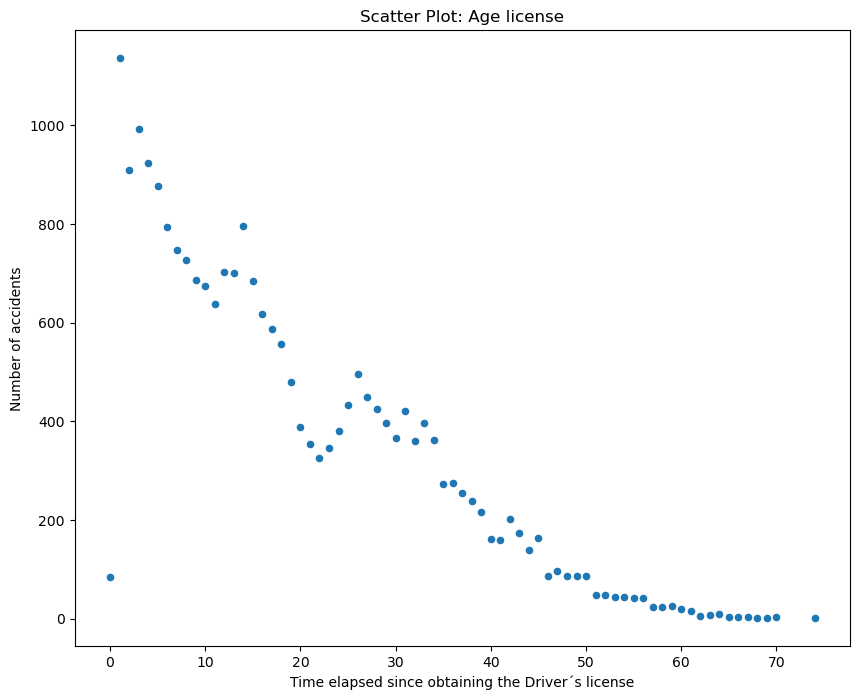

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8)) 

unique_values = ([1, 3, 4, 2, 5, 14, 6, 7, 8, 12, 13, 9, 15, 10, 11, 16, 17, 18, 26, 19, 27, 25, 28, 31, 29, 33, 20, 24, 30, 34, 32, 21, 23, 22, 36, 35, 37, 38, 39, 42, 43, 45, 40, 41, 44, 47, 50, 48, 46, 49, 0, 51, 52, 53, 54, 55, 56, 59, 58, 57, 60, 61, 64, 63, 62, 65, 66, 67, 70, 68, 69, 74])

counts = tipo['Age license'].value_counts()

plt.scatter(unique_values, counts, s=20)

plt.ylabel('Number of accidents')
plt.xlabel('Time elapsed since obtaining the Driver´s license')


plt.title('Scatter Plot: Age license')
plt.show()


In [41]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17919 entries, 0 to 17918
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Case_number                     17919 non-null  object 
 1   District_code                   17919 non-null  int64  
 2   District_name                   17919 non-null  object 
 3   Neighborhood_code               17919 non-null  int64  
 4   Neighborhood_name               17919 non-null  object 
 5   Street_code                     17919 non-null  int64  
 6   Street_name                     17919 non-null  object 
 7   Postal_number                   17919 non-null  object 
 8   Week_day                        17919 non-null  object 
 9   Year                            17919 non-null  int64  
 10  Month                           17919 non-null  int64  
 11  Month_name                      17919 non-null  object 
 12  Day_month                       

In [42]:
df_tot['Pedestrian_collision_place'].value_counts()

Pedestrian_collision_place
Desconegut                                                                                                                                                15653
En pas regulat per semàfor                                                                                                                                  916
Fora del pas                                                                                                                                                550
A la vorera / Andana                                                                                                                                        270
En pas sense regular                                                                                                                                        227
Altres                                                                                                                                                      149
En zona peato

In [43]:
tipo['Type_of_vehicle'].value_counts()

Type_of_vehicle
Tourism                               9363
Motorcycle                            7976
Van                                   1722
Ciclomotor                             918
Taxi                                   803
Bus                                    704
Articulated bus                        312
Bicycle                                306
Rigid truck <= 3.5 tonnes              285
Rigid truck > 3.5 tonnes               262
SUV                                    233
Veh. motor personal mobility           191
Tractor truck                           90
Ambulance                               64
Other                                   38
Construction and service machinery      25
Quadricycle < 75 cc                     13
Train or tram                           13
Coach                                    7
Motorhome                                4
Quadricycle > 75 cc                      3
Pick up                                  3
Tricycle                              

In [44]:
pd.crosstab(index=df_tot['Sex'],
            columns=df_tot['Person_type'], margins=True).apply(lambda r: r)

Person_type,Driver,Passenger,Pedestrian,All
Sex,,,,
Man,8817,1030,785,10632
Unknown,3,1,1,5
Woman,3861,2350,1071,7282
All,12681,3381,1857,17919


<Figure size 432x432 with 0 Axes>

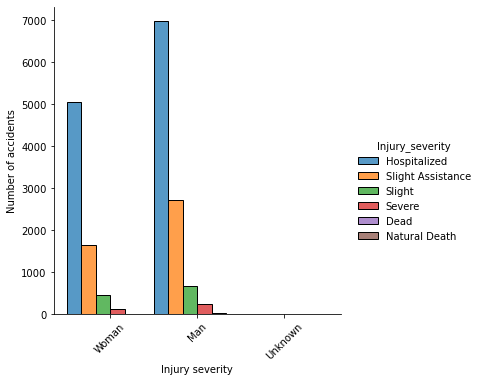

<Figure size 432x432 with 0 Axes>

In [273]:
sns.displot(df_tot, x="Sex", hue="Injury_severity" , multiple="dodge")
plt.xlabel('Injury severity', fontsize=10)
plt.ylabel('Number of accidents', fontsize=10)
plt.xticks(rotation=45)
plt.figure(figsize=(6, 6))

In [274]:
df_tot['Sex'].value_counts()

Man        10632
Woman       7282
Unknown        5
Name: Sex, dtype: int64

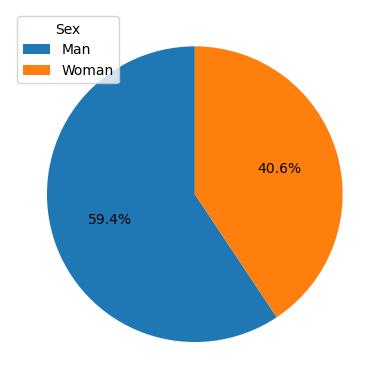

In [45]:
values=df_tot['Sex'].value_counts()

# Get the top 3 most repeated values
top3_values = values.index.values[:2]
plt.pie(values.loc[top3_values], autopct='%1.1f%%', startangle=90)
plt.legend(top3_values, loc='upper left', title='Sex')

plt.show()